# Module 1 - Autograded Assignment

### Outline:
**Here are the objectives of this assignment:**

1. Familiarize yourself with the basics of R and Jupyter Notebooks.
2. Visualize data using scatterplots, histograms and density plots.
3. Center, Scale and Standardize predictors so they end up with similar distributions.
4. Fit a best fit line to data and plot the results.
5. Observe the effects of standardized data on best fit lines.
6. Reinforce our understanding of the "linear" part of linear regression models.

**Here are some general tips:**

1. Read the questions carefully to understand what is being asked.
2. When you feel that your work is completed, feel free to hit the ```Validate``` button to see your results on the *visible* unit tests. If you have questions about unit testing, please refer to the "Module 0: Introduction" notebook provided as an optional resource for this course. In this assignment, there are hidden unit tests that check your code. You will not recieve any feedback for failed hidden unit tests until the assignment is submitted. **Do not misinterpret the feedback from visible unit tests as all possible tests for a given question--write your code carefully!**
3. Before submitting, we recommend restarting the kernel and running all the cells in order that they appear to make sure that there are no additional bugs in your code.
4. There are 50 total points in this assignment. 

In [1]:
options(warn=1)

In [2]:
# This cell loads the necesary libraries for this assignment
library(testthat)
library(tidyverse)

Error in get(genname, envir = envir) : object 'testthat_print' not found


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::is_null() masks testthat::is_null()
✖ dplyr::lag()     masks stats::lag()
✖ dplyr::matches() masks tidyr::matches(), testthat::matches()



# Problem 1: The Basics of Standardizing Data

Welcome to your first problem on your first autograded assignment! Don't worry, they aren't that bad. Just know that, with respect to the autograder, there are three types of cells:

* Read-Only Cells: You can run these cells, but can't change any of the code or markdown inside of them. These will be used for us to give you questions or code that you will need.
* Autograded Answer Cells: This is where you will write your code to answer the prompts. Be sure to answer the prompts with the specified methods and variables. Otherwise, you won't receive credit. If needed, you can always create additional cells to do other work.
* Autograded Test Cells: These cells test your code and are usually located just after an Autograded Answer cell. For the most part, you can't interact with these cells (including delete them, sorry!). Note that there can be both visible and hidden tests in any autograded test cell. Make sure your code passes all the visible tests. You will only get feedback on the hidden tests once you've submitted the assignment.

Now on to the actual problem! We will be analyzing a dataset of how much a person's age and income affects their opinion of turtles. That's right, some people don't like turtles, and in Problem 2, we'll investigate this important issue! But, before that, we'll first learn to *standardize* the predictor variables. By the end of this problem, we will have standardized both the `age` and `income` predictors in order to begin addressing the "crisis".

In the code cells below, we load in the data and visualize those two features with some histograms and a scatter plot. Think about what information we can gather about the two predictors just from these plots.

In [3]:
# Load the data
turtle.data = read.csv("turtle.csv")
head(turtle.data)

,age,income,turtle_rating
,<int>,<int>,<int>
1,33,66400,1
2,40,55600,-2
3,76,73400,-1
4,46,73200,-4
5,47,72300,-4
6,79,70300,1


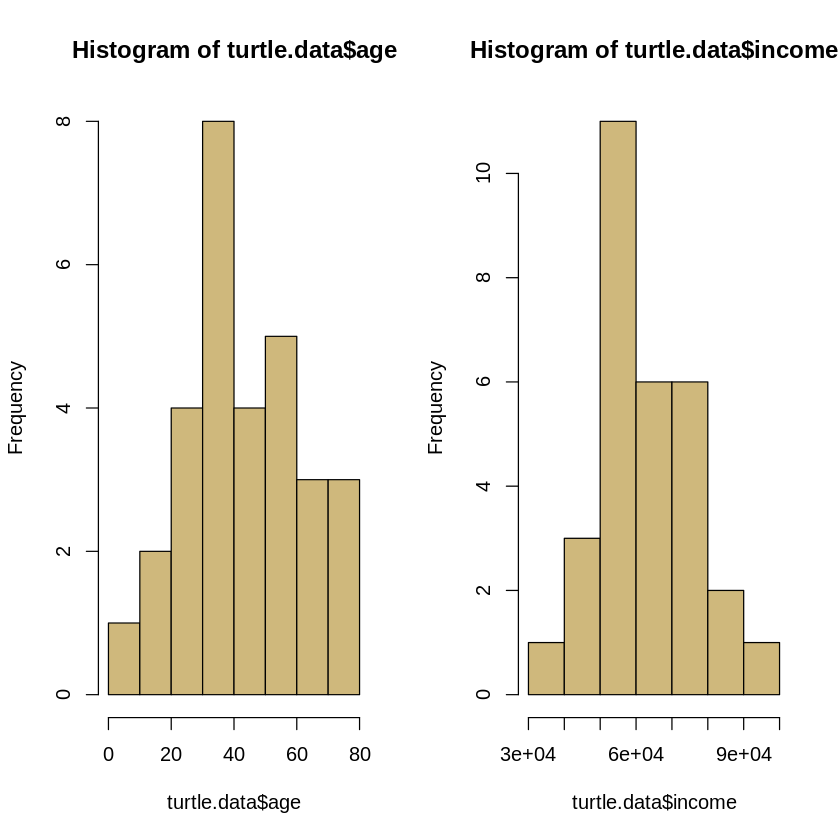

In [4]:
# Histograms of the age and income features
par(mfrow = c(1, 2))
hist(turtle.data$age, col="#CFB87C")
hist(turtle.data$income, col="#CFB87C")

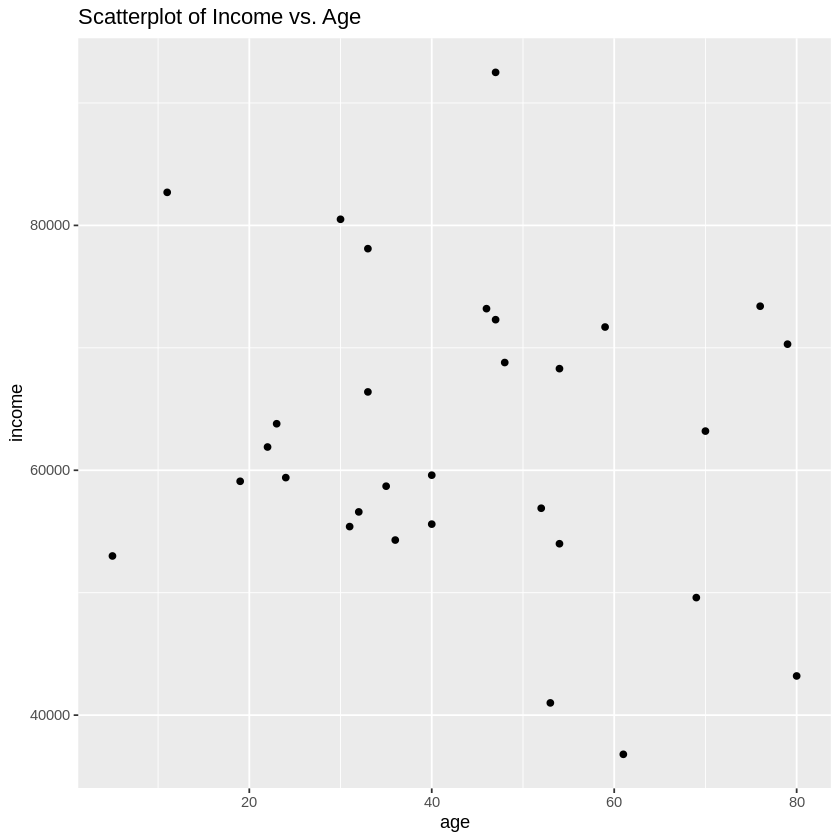

In [5]:
g = ggplot(turtle.data, aes(x=age, y=income)) + 
    # This function adds the points for the scatterplot
    geom_point() +
    # This function adds the title (and potentially other labels)
    labs(title="Scatterplot of Income vs. Age")
g

#### 1. (a) Centering the data (9 points)

Well, that plot looks nice. But notice the scale of the axes. The x-axis has a range of about $[10, 90]$ and the y-axis has a range of $[20,000 , 90,000]$. These ranges raise two issues with respect to the interpretation of a regression model:

1. Recall that the intercept parameter is interpreted as the mean of the response when each predictor is zero. But in this case, zero is not a meaningful value for the `age` predictor. 


2. Recall that a slope parameter in multiple linear regression is interpreted as the average change in the response for a *one-unit increase* in the value of the corresponding predictor, holding other predictors constant. But, for this problem, do we really care about how a "one dollar increase in (yearly) salary" impacts turtle rating? Probably not. It would be more convenient to interpret the change turtle rating with respect to bigger jumps in income, say, one thousand dollar increases. 

To better assess and interpret the affect of the predictors on `turtle_rating`, we can changes our scales! Let's start by centering our data, which requires setting the mean of each predictor equal to $0$ (note how that changes the interpretation of the intercept parameter!). To do this, we can subtract the mean value of each predictor from each value. So, for instance:

$$ x^{centered}_{1,age} = x_{1,age} - \bar{x}_{age} $$

Center the `age` and `income` data and save the updated vectors into `age.centered` and `income.centered` respectively. Then recreate the plot above with the centered data, which should be stored in `g.centered`. Make sure to use ggplot! 

Tip for plotting with ggplot: The `ggplot()` function requires the data to be in a `data.frame` object. It might be useful to save your centered vectors into a data.frame with `df.centered = data.frame(age=age.centered, income=income.centered)`.

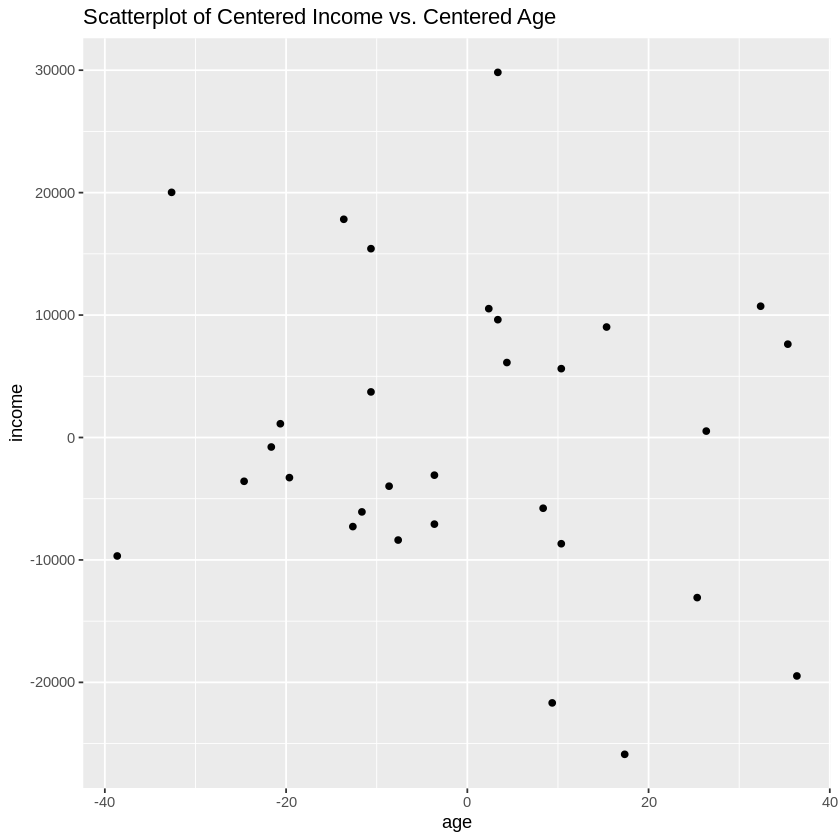

In [6]:
# Center the age and income data
age.centered <- turtle.data$age - mean(turtle.data$age)
income.centered <- turtle.data$income - mean(turtle.data$income)

# Create a data frame with centered data
df.centered <- data.frame(age = age.centered, income = income.centered)

# Plot centered data
g.centered <- ggplot(df.centered, aes(x=age, y=income)) + 
    geom_point() +
    labs(title="Scatterplot of Centered Income vs. Centered Age")
print(g.centered)



In [7]:
# Test Cell

if(test_that("Checking the class of the plot", {expect_is(g.centered, "ggplot")})){
    print("Good job.")
    print("Make sure your answers are correct, there are hidden tests and you won't recieve feedback on them until you submit your assignment!")
}else{
    print("Make sure to use ggplot for your plotting.")
    print("It's annoying at first, but it's a very powerful visualization tool once you get the hang of it.")
}

# Note: Each question may have some hidden tests!
# Make sure you're confident in your answers!


[1] "Good job."
[1] "Make sure your answers are correct, there are hidden tests and you won't recieve feedback on them until you submit your assignment!"


#### 1. (b) Scaling the Data (9 points)

Our plot shows that both `age` and `income` are centered at $0$, which is good, since it will fix our intercept interpretation. But the range of the predictors is still very different, which means that our slope interpretations will still be awkward. How do we address that? Well, we know that the "spread" of a variable is represented by its standard deviation. Therefore, if we divide the centered predictors by their standard deviation, the new "standardized" `age` and `income` variables will both have the same spread. In math terms:

$$ x^{scaled}_{i,age} = \dfrac{x_{i,age}}{std.dev(x_{age})} $$

Note that the process of both centering and scaling data is called standardizing.

$$ x^{standardized}_{i,age} = \dfrac{x^{centered}_{i,age}}{std.dev(x_{age})} = \dfrac{x_{i,age} - \bar{x}_{age}}{std.dev(x_{age})} $$

Standardize both the `age` and `income` predictors, and save the standardized vectors into `age.stand` and `income.stand` respectively. Then plot our scaled data using ggplot. Save your plot as `g.stand`.

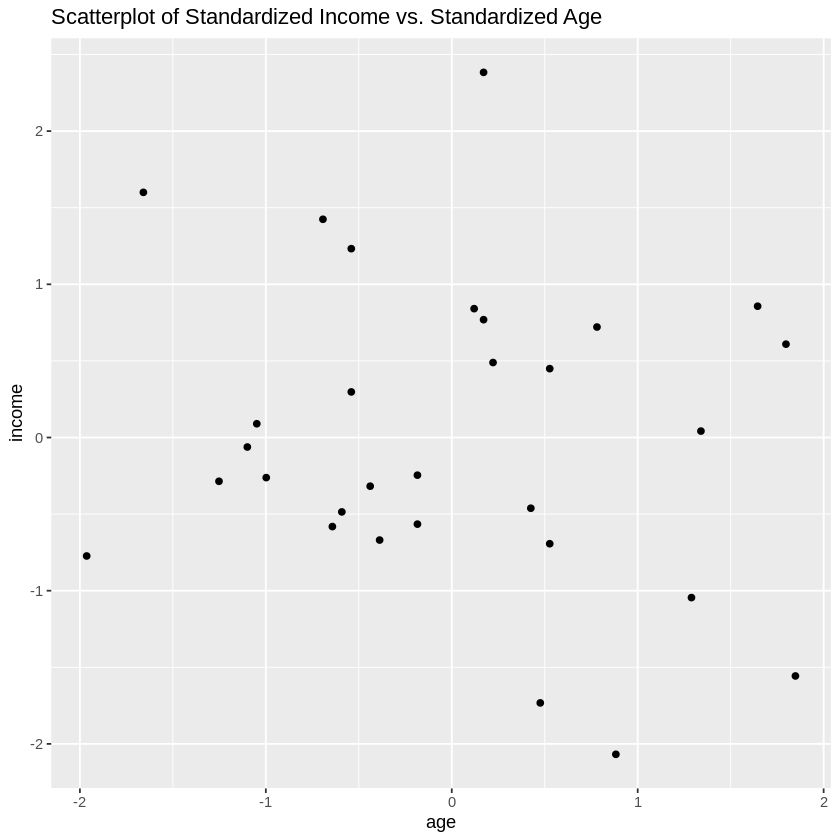

In [8]:
# Standardize the age and income data
age.stand <- age.centered / sd(turtle.data$age)
income.stand <- income.centered / sd(turtle.data$income)

# Create a data frame with standardized data
df.stand <- data.frame(age = age.stand, income = income.stand)

# Plot standardized data
g.stand <- ggplot(df.stand, aes(x=age, y=income)) + 
    geom_point() +
    labs(title="Scatterplot of Standardized Income vs. Standardized Age")
print(g.stand)


In [9]:
# Test Cell
# This cell has hidden test cases that will run after submission.


Note that this should fix the interpretation of the slope parameters: if we were to use the standardized variables in a regression, a "one-unit increase" would be a "one-standard deviation increase"!

#### 1. (c) Wait what?

So we just did a bunch of math, and now people can have a negative age and income? Of course not! Instead, we've just changed the units; the new units measure income but are centered at zero, with a "standard" spread. In addition, the order of the data is still preserved. Let's visualize the resulting predictors!

Recall at the beginning of this problem, there were some histograms for `age` and `income`. Using ggplot, create density plots (using `geom_density()`) for the standardized versions of those two predictors. Overlay the standard normal curve onto both of these plots. Save these plots as `g.age` and `g.income`.

What do you notice?

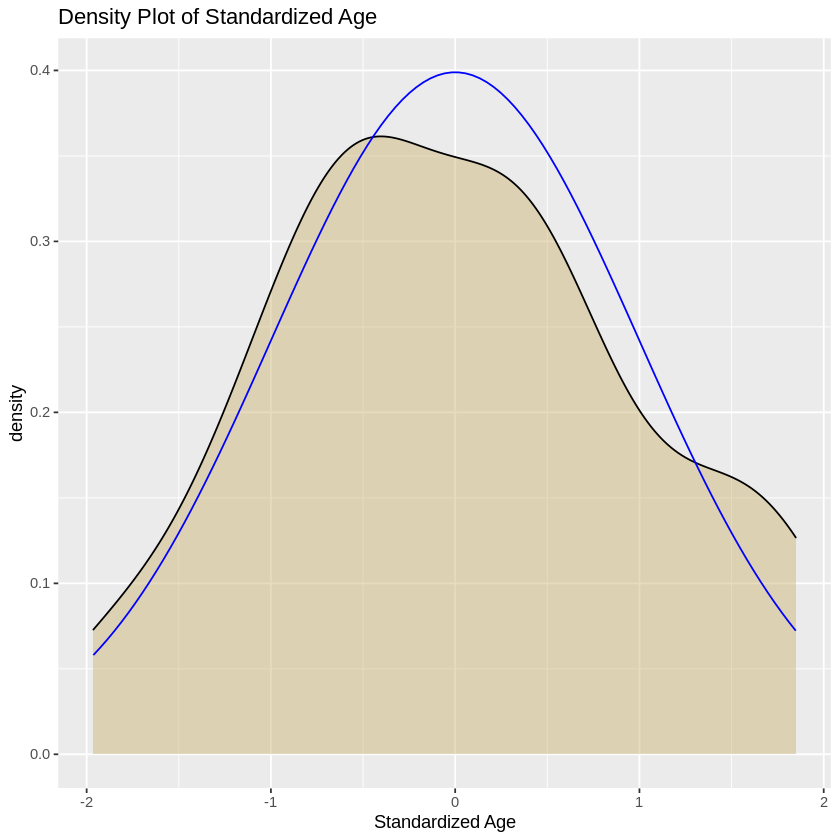

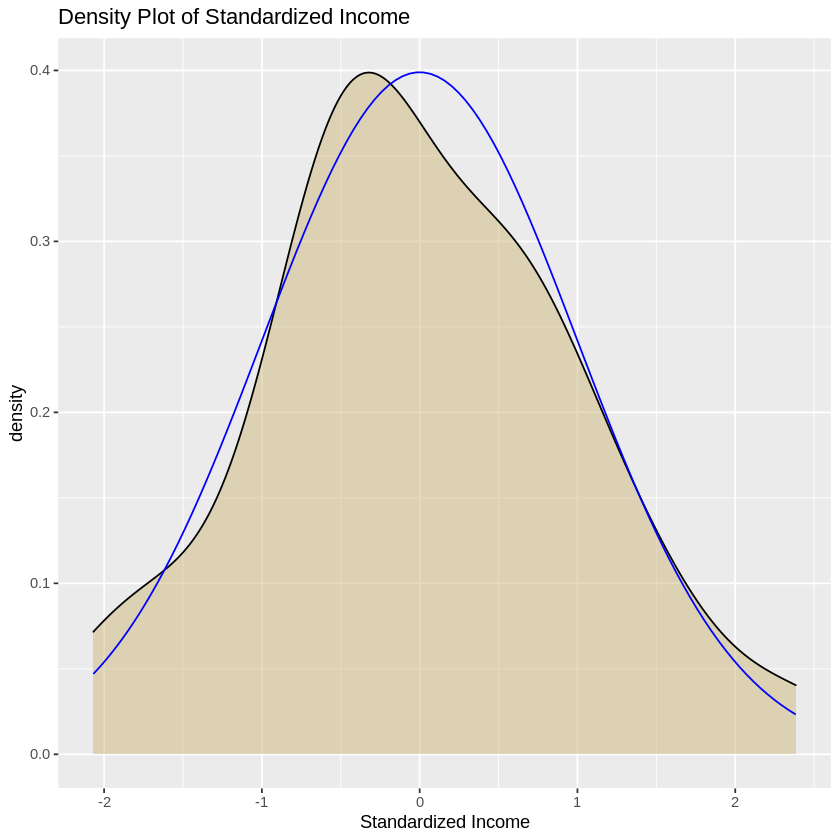

In [10]:
# Density plot for standardized age
g.age <- ggplot(df.stand, aes(x=age)) +
    geom_density(fill="#CFB87C", alpha=0.5) +
    stat_function(fun=dnorm, args=list(mean=0, sd=1), color="blue") +
    labs(title="Density Plot of Standardized Age", x="Standardized Age")
print(g.age)

# Density plot for standardized income
g.income <- ggplot(df.stand, aes(x=income)) +
    geom_density(fill="#CFB87C", alpha=0.5) +
    stat_function(fun=dnorm, args=list(mean=0, sd=1), color="blue") +
    labs(title="Density Plot of Standardized Income", x="Standardized Income")
print(g.income)


Observations

- Centered Data: The intercept in a regression model now represents the mean turtle rating when age and income are at their average values.
- Standardized Data: The slope coefficients in the regression will represent the change in turtle rating for a one standard deviation increase in age or income, making them more interpretable.
- Density Plots: These plots compare the distributions to a standard normal distribution, helping to visualize skewness or kurtosis in the original data.

# Problem 2: Using Our Standardized Data 

Now that we have standardized versions of the predictors, let's see how they are related to the response, `turtle_rating`.

In problem 1, we made a claim that standardizing the data could affect our best fit line. Let's see if that claim is true.

#### 2. (a) Slope of the Original Data (10 points)

Using the original data (`turtle.data`), create a scatterplot with ggplot named `g.turtle` that has `turtle_rating` on the y-axis and `income` on the x-axis. Then add the best fit line by adding the layer `geom_smooth(method="lm", se=FALSE, color="#CFB87C")`.

To find the exact slope of our best fit line, we can use the `lm()` function. We will be learning more about this function in future modules, but for now, all we need to know is that it calculates the best fit line. Use the form `lm(response.name~predictor.name, data=dataset.name)$coefficients[2]` to get the slope of our line. Store that value in `turtle.slope`.

`geom_smooth()` using formula 'y ~ x'



income 
-6.339419e-05

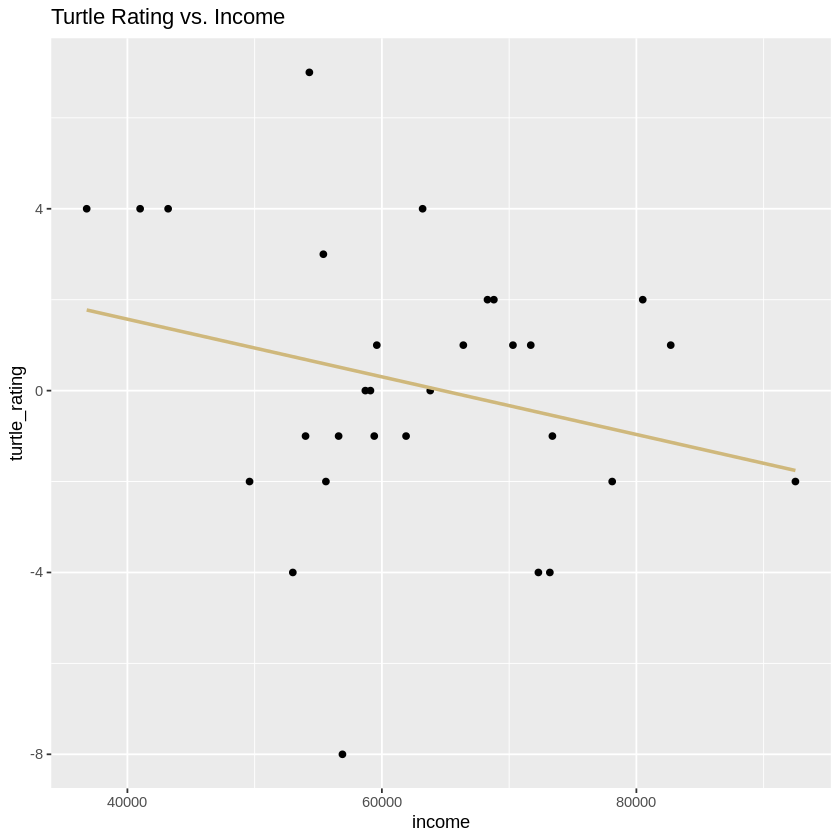

In [11]:
# Scatterplot with the original data
g.turtle <- ggplot(turtle.data, aes(x=income, y=turtle_rating)) +
    geom_point() +
    geom_smooth(method="lm", se=FALSE, color="#CFB87C") +
    labs(title="Turtle Rating vs. Income")
print(g.turtle)

# Calculate the slope of the best fit line
turtle.slope <- lm(turtle_rating ~ income, data=turtle.data)$coefficients[2]
turtle.slope


In [12]:
# Test Cell
if(!test_that("Checking class of plot", {expect_is(g.turtle, "ggplot")})){
    print("Make sure your plots are made in ggplot.")
}
# This cell has hidden test cases that will run after submission.

#### 2. (b) Slope of the Standardized Data (10 points)

Repeat the above with the standardized income data. Store the slope in `turtle.slope.stand` and the plot in `g.turtle.stand`.

Take note of whether the slope has changed with the use of the standardized predictors!

`geom_smooth()` using formula 'y ~ x'



income 
-0.793188

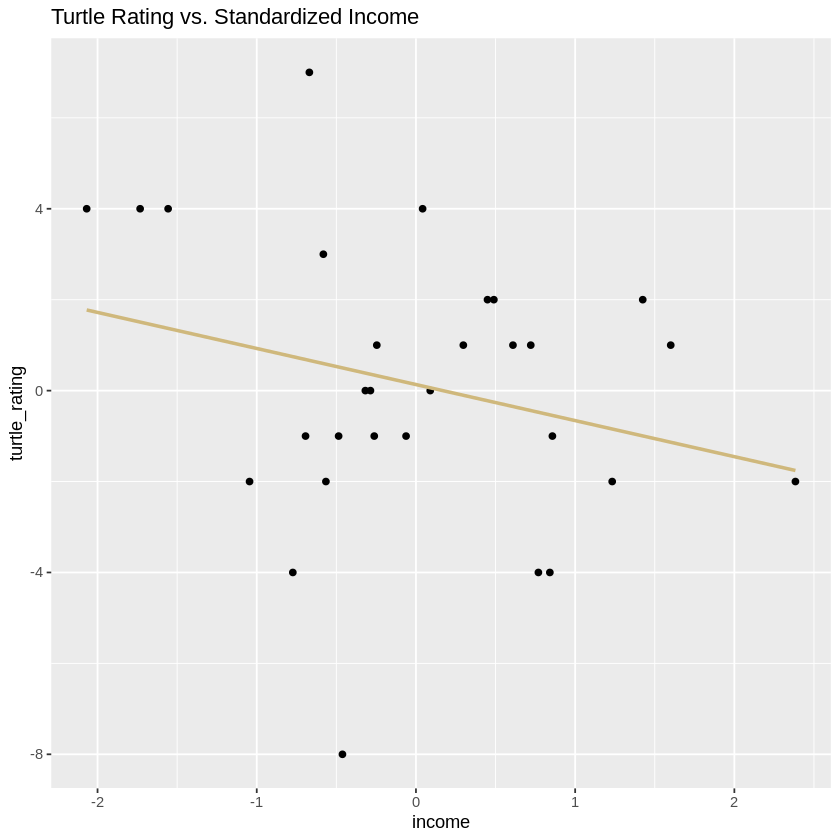

In [13]:
# Adding the turtle_rating to the standardized dataframe
df.stand$turtle_rating <- turtle.data$turtle_rating

# Scatterplot with the standardized data
g.turtle.stand <- ggplot(df.stand, aes(x=income, y=turtle_rating)) +
    geom_point() +
    geom_smooth(method="lm", se=FALSE, color="#CFB87C") +
    labs(title="Turtle Rating vs. Standardized Income")
print(g.turtle.stand)

# Calculate the slope of the best fit line with standardized data
turtle.slope.stand <- lm(turtle_rating ~ income, data=df.stand)$coefficients[2]
turtle.slope.stand


In [14]:
# Test Cell
test_that("Check class of plot", {expect_is(g.turtle.stand, "ggplot")})
# This cell has hidden test cases that will run after submission.


# Problem 3: What Counts As A Linear Model? (12 points)

When thinking about linear regression models, the "linear" term can lead to confusion. To make sure you have a strong grasp of what is and is not considered linear, please look at the following models. In the code cell below, answer `TRUE` if the corresponding model is a "linear regression model" and `FALSE` if it is not.

1. $y_i = \beta_0$
2. $y_i = \beta_0 + \beta_1 x_{i,1} + \beta_2^2 x_{i,2}^2$
3. $y_i = \beta_0 + \beta_1^{x_i}$
4. $y_i = \beta_0 + \log(\beta_1 x_i)$
5. $y_i = \beta_0 \log (\beta_1 x_i)$
6. $y_i = \beta_0 + \beta_1 \sin(x_{i,1}) + \beta_2 e^{x_{i_2}} + \beta_3 \log (x_{i,3})$

In [15]:
# Answer each question by replacing each NA with the corresponding boolean of TRUE or FALSE.
prob.2.1 <- TRUE  # y_i = β_0 (This is a linear model)
prob.2.2 <- TRUE  # y_i = β_0 + β_1 x_{i,1} + β_2^2 x_{i,2}^2 (β_2^2 is a constant; the model is linear in parameters)
prob.2.3 <- FALSE # y_i = β_0 + β_1^{x_i} (Exponential in β_1, not linear)
prob.2.4 <- FALSE # y_i = β_0 + log(β_1 x_i) (Log of β_1, not linear)
prob.2.5 <- FALSE # y_i = β_0 log(β_1 x_i) (β_0 multiplied by log, not linear)
prob.2.6 <- TRUE  # y_i = β_0 + β_1 sin(x_{i,1}) + β_2 e^{x_{i_2}} + β_3 log(x_{i,3}) (Linear in parameters)

# Assign the values
prob.2.1
prob.2.2
prob.2.3
prob.2.4
prob.2.5
prob.2.6


[1] TRUE

[1] TRUE

[1] FALSE

[1] FALSE

[1] FALSE

[1] TRUE

In [16]:
# Test Cell

# Make sure the type of the answers is boolean
if(test_that("Check answer types", {expect_is(prob.2.1, "logical")})){
    print("Answers are booleans")
}else{
    print("Answers aren't booleans! Make sure they are, or else they will be incorrect.")
}
# This cell has hidden test cases that will run after submission.

[1] "Answers are booleans"


In [17]:
# Test Cell
# This cell has hidden test cases that will run after submission.

In [18]:
# Test Cell
# This cell has hidden test cases that will run after submission.

In [19]:
# Test Cell
# This cell has hidden test cases that will run after submission.

In [20]:
# Test Cell
# This cell has hidden test cases that will run after submission.

In [21]:
# Test Cell
# This cell has hidden test cases that will run after submission.